# Кунг фу графиков

Как сделать, чтобы графики и в браузере тоже были векторными

In [1]:
# Настроим
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg',  'pdf']
%matplotlib inline

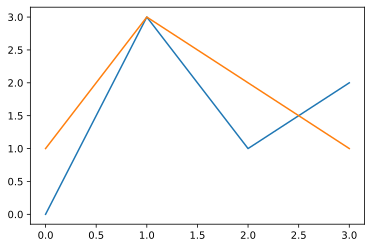

In [2]:
plt.plot([0, 1, 2, 3], [0, 3, 1, 2])
plt.plot([0, 1, 2, 3], [1, 3, 2, 1])

plt.show(); # В Jupyter необязательно 

Как менять стили графиков

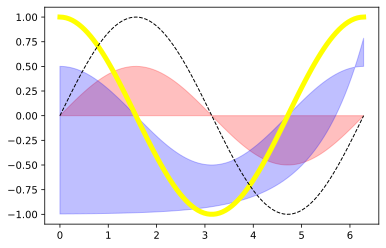

In [3]:
import numpy as np
import math

xs = np.linspace(0, 2*math.pi, 100)



plt.fill_between(
    xs,
    0, 1/2*np.sin(xs),
    color='red', alpha=0.25
)
plt.fill_between(
    xs,
    1/300*np.exp(xs) - 1, 1/2*np.cos(xs),
    color='blue', alpha=0.25
)
plt.plot(xs, np.vectorize(math.cos)(xs), color='yellow', linewidth=5)
plt.plot(xs, np.sin(xs), color='black', linewidth=1, linestyle='dashed')

plt.show();

Как сделать одинаковый масштаб по осям и добавить сетку и подписи

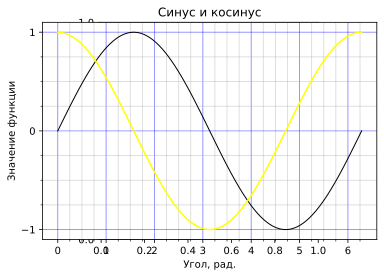

In [4]:
# Масштаб
plt.gca().set_aspect('equal')

# Сетка
ax = plt.axes()
ax.set_xticks(np.arange(0, 2*math.pi + 0.1, 1))
ax.set_yticks(np.arange(-1, 2, 1))
ax.set_xticks(np.arange(0,2*math.pi,0.25), minor=True)
ax.set_yticks(np.arange(-1,1,0.25), minor=True)
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.5, color='blue')

# Подписи
plt.xlabel('Угол, рад.')
plt.ylabel('Значение функции')
plt.title('Синус и косинус')

# Графики
plt.plot(
    xs, np.sin(xs),
    color='black', linewidth=1)
plt.plot(
    xs, np.cos(xs),
    color='yellow')

plt.show();

Как сделать у сетки логарифмический масштаб

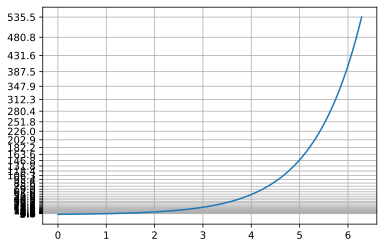

In [5]:
ax = plt.axes()
ax.set_yticks(np.logspace(1, 2*math.pi, base=math.e))
ax.grid(which='major')

plt.plot(xs, np.exp(xs))

plt.show();

Как сделать логарифмический масштаб у всего графика, и, чтобы не перепутать, где экспонента, а где прямая — вывести легенду

No handles with labels found to put in legend.


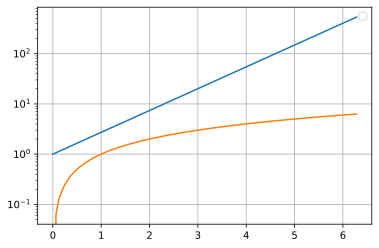

In [6]:
ax = plt.axes()

# Логарифмический масштаб по оси Y
ax.set_yscale('log')
ax.grid()

# Легенда
ax.legend()

# Графики с легендой
plt.plot(xs, np.exp(xs), label="$e^x$")
plt.plot(xs, xs, label="Тождественная ф-ция")

plt.show();

# Кунг фу «плоских, но цветных» поверхностей

Легче показать, чем объяснить, что имелось в виду =)

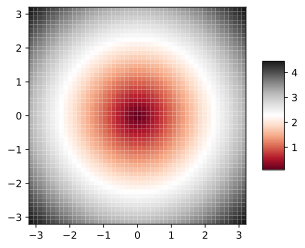

In [7]:
from matplotlib import cm
X, Y = np.meshgrid(
    np.linspace(-math.pi, math.pi, 50),
    np.linspace(-math.pi, math.pi, 50)
)

Z = np.sqrt(X**2 + Y**2)

plt.gca().set_aspect('equal')
surf = plt.pcolor(
    X, Y, Z,
    cmap=cm.RdGy, shading='auto')  # Цветовые карты: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html#diverging
plt.colorbar(surf, shrink=0.5, aspect=5)

plt.show();

# Кунг фу поверхностей и кривых в 3D

**Обратите внимание: если запускать не блокнот, а отдельную программу, то `plt.show()` покажет трёхмерный объект, который можно будет интерактивно вращать и приближать, после чего печатать, сохранять как PDF или SVG и т.д.** Такого же интерактива можно добиться и в Jupyter, но ценой довольно сложных настроек.

Как рисовать поверхности

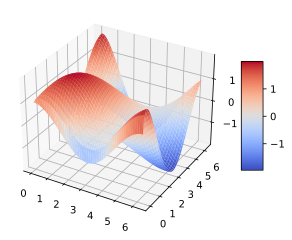

In [8]:
ys = xs

# X, Y — набор всех точек на плоскости в достаточно задумчивом
# формате. См. help(numpy.meshgrid)
X, Y = np.meshgrid(xs, ys)

# Z — набор значений функции в этих точках
Z = np.sin(np.sqrt(X*Y)) + np.cos(Y-X)

ax = plt.axes(projection='3d')
surf = ax.plot_surface(
    X, Y, Z,
    cmap=cm.coolwarm
)
plt.colorbar(surf, shrink=0.5, aspect=5)

plt.show();

Как рисовать кривые

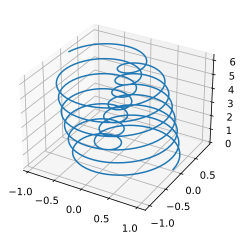

In [9]:
angles = np.arange(0, 20*math.pi, 0.1)
Z = angles / 10
X = np.cos(angles) * np.cos(angles / 2.9)
Y = np.sin(angles) * np.cos(angles / 2.9)

ax = plt.axes(projection='3d')
ax.plot(X, Y, Z)

plt.show();

Или попороще

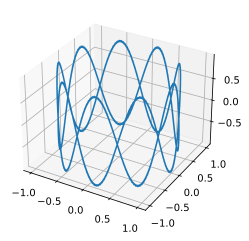

In [10]:
Z = np.cos(angles * 4.5 + 0.1)
X = np.cos(angles)
Y = np.sin(angles)

ax = plt.axes(projection='3d')
ax.plot(X, Y, Z)

plt.show();

# Кунг фу гистограмм

Простой вариант вручную

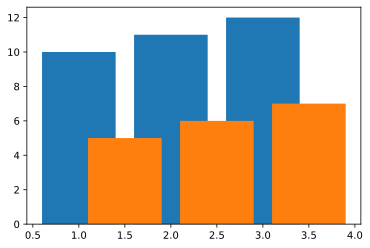

In [11]:
plt.bar([1.0, 2.0, 3.0], [10, 11, 12])
plt.bar([1.5, 2.5, 3.5], [ 5,  6,  7])

plt.show();

Посложнее — посмотрим на распределение экспериментов (должно быть похоже на нормальное)

In [12]:
from numpy import random as nr

# 5000 экспериментов по 5 случайных
experiments = [
    sum(nr.random((5,))) / 5  # Среднее из 500 равномерно распределённых случайных
    for _ in range(5000)
]

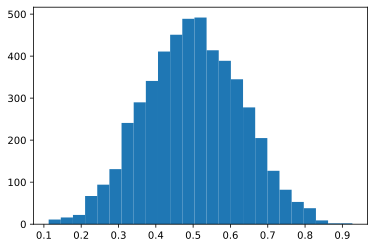

In [13]:
plt.hist(experiments, bins=25)

plt.show();

Или как совсем взрослые =)

Конфигурация ящика по умолчанию:

* Границы ящика — 25-й и 75-й процентили
* Средняя линия — 50-й процентиль
* «Усы» — границы статистически значимой части данных
* Кружочки — данные за границами статистически значимых (выбросы)

И это всё настраивается.

На гистограмме те же данные, что и в гауссовском распределении выше + ещё два набора чисел с выбросами.

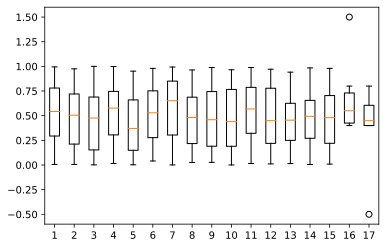

In [14]:
experiments = [
    nr.random((50,))
    for _ in range(15)
] + [
    [ 1.5, 0.4, 0.4, 0.45, 0.55, 0.66, 0.8],
    [-0.5, 0.4, 0.4, 0.45, 0.55, 0.66, 0.8]

]
plt.boxplot(experiments)

plt.show();